In [3]:
import sys
sys.path.append(r"/home/graham/Documents/Ironhack/Final-Project")
import src
import numpy as np

In [4]:
'''USING H20 TO FIND BETTER MODELS'''
import h2o
from h2o.automl import H2OAutoML

# Start H2O cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 36 mins
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_graham_0got4q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.909 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [5]:
path = ('/home/graham/Documents/Ironhack/Final-Project/data/combined_data.csv')
df = src.read_csv_file(path)


In [6]:
df = h2o.import_file(path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
target_col = '2022 Inf'
train, valid = df.split_frame(ratios=[0.7], seed=42)
model = H2ORandomForestEstimator(
    ntrees=200,
    max_depth=20,
    min_rows=2,
    mtries=4,
    nfolds=10,
    seed=1234
)

# Train the model
model.train(
    x=train.names[:-1],
    y=train.names[-1],
    training_frame=train
)

drf Model Build progress: |

/home/graham/anaconda3/envs/streamlit/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [Code]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1678956268704_15


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    200                200                         27178                  2            6            3.675         4             9             6.125

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 3.144689146763814
RMSE: 1.7733271403674546
MAE: 1.1712748242374764
RMSLE: 0.20816111411804678
Mean Residual Deviance: 3.144689146763814

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 3.7610578827174392
RMSE: 1.9393447044601018
MAE: 1.359200426391933
RMSLE: 0.22839263764300563
Mean Residual Deviance: 3.7610578827174392

Cross-Validation Metrics Summary: 
                        mean      sd        cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  --------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     1.51956   1.80523   0.402444      1.68197       1.81661       0.672778      0.11025       0.343278      1.05554       1.53308       1.2056        6.37408
mean_residual_deviance  5.54827   12.4108   0.287651      3.59795       4.01729       0.528546      0.0121551     0.12125       1.40527       2.35034       2.53333       40.6289
mse                     5.54827   12.4108   0.287651      3.59795       4.01729       0.528546      0.0121551     0.12125       1.40527       2.35034       2.53333       40.6289
r2                      -inf      nan       0.97101       0.779026      0.796787      0.975021      -inf          0.98575       -3.64553      -inf          0.52111       -inf
residual_deviance       5.54827   12.4108   0.287651      3.59795       4.01729       0.528546      0.0121551     0.12125       1.40527       2.35034       2.53333       40.6289
rmse                    1.63072   1.79165   0.536331      1.89683       2.00432       0.727012      0.11025       0.34821       1.18544       1.53308       1.59164       6.37408
rmsle                   0.188005  0.141979  0.0403402     0.281048      0.26292       0.0619865     0.0138592     0.0360884     0.155594      0.324451      0.315271      0.388495

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2023-03-16 11:21:21  11.203 sec  0.0                nan                 nan                 nan
     2023-03-16 11:21:21  11.211 sec  1.0                1.8396800191726201  1.4807691940894494  3.384422572942972
     2023-03-16 11:21:21  11.223 sec  2.0                2.2197115442299618  1.635784289416145   4.927119339587762
     2023-03-16 11:21:21  11.230 sec  3.0                2.086854044798727   1.5063492230006628  4.354959804292808
     2023-03-16 11:21:21  11.235 sec  4.0                1.9404531648715198  1.3986773263840449  3.765358485059897
     2023-03-16 11:21:21  11.244 sec  5.0                2.10002512765288    1.537752628326416   4.410105536773495
     2023-03-16 11:21:21  11.252 sec  6.0                1.9962485195585569  1.4443237539650737  3.9850081518397302
     2023-03-16 11:21:21  11.256 sec  7.0                2.0800061166552086  1.534782658452573   4.326425445323081
     2023-03-16 11:21:21  11.262 sec  8.0                2.1960767255408613  1.6124275870945142  4.822752984462271
     2023-03-16 11:21:21  11.265 sec  9.0                2.215800

In [8]:
cv_models = model.cross_validation_models()

# Find the model with the best R-squared score on the validation set
best_model = None
best_r2 = float('-inf')
best_cv = -1

for i, cv_model in enumerate(cv_models):
    r2 = float(cv_model.r2(valid=True))
    print(f"CV {i+1} R-squared: {r2:.4f}")
    if r2 > best_r2:
        best_model = cv_model
        best_r2 = r2
        best_cv = i+1

print(f"\nBest model: CV {best_cv} (R-squared: {best_r2:.4f})")

# Use the best model for prediction
predictions = best_model.predict(valid)


CV 1 R-squared: 0.9710
CV 2 R-squared: 0.7790
CV 3 R-squared: 0.7968
CV 4 R-squared: 0.9750
CV 5 R-squared: -inf
CV 6 R-squared: 0.9858
CV 7 R-squared: -3.6455
CV 8 R-squared: -inf
CV 9 R-squared: 0.5211
CV 10 R-squared: -inf

Best model: CV 6 (R-squared: 0.9858)
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [9]:
# Calculate R-squared on the test set
r2 = best_model.r2(valid=True)
print(f"R-squared: {r2:.4f}")

# Calculate MAE on the test set
mae = best_model.mae(valid=True)
print(f"MAE: {mae:.4f}")

# Calculate RMSE on the test set
rmse = best_model.rmse(valid=True)
print(f"RMSE: {rmse:.4f}")

# Calculate MAPE on the test set
actuals = valid[target_col].as_data_frame().values.flatten()
preds = predictions['predict'].as_data_frame().values.flatten()
mape = np.mean(np.abs((actuals - preds) / actuals)) * 100
print(f"MAPE: {mape:.2f}%")


R-squared: 0.9858
MAE: 0.3433
RMSE: 0.3482
MAPE: 78.81%


In [10]:
model_path = "/home/graham/Documents/Ironhack/Final-Project/best_model.mojo"
best_model.download_mojo(model_path)


'/home/graham/Documents/Ironhack/Final-Project/best_model.mojo'

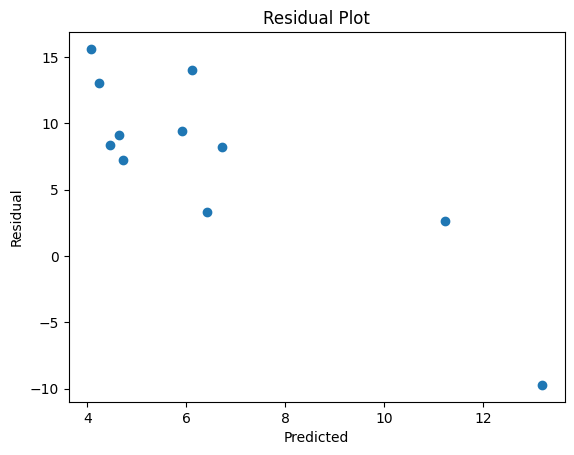

In [11]:
import matplotlib.pyplot as plt

# Get the actual target values for the validation set
y_true = valid[target_col].as_data_frame().values

# Get the predicted target values for the validation set
y_pred = predictions['predict'].as_data_frame().values

# Calculate the residuals
residuals = y_true - y_pred

# Create a scatter plot of the residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.savefig('/home/graham/Documents/Ironhack/Final-Project/images/residuals2.png', bbox_inches='tight')
plt.show()

In [12]:
df['2023 inflation'] = np.nan
predictions = model.predict(df)
df['2023 inflation'] = predictions['predict']

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


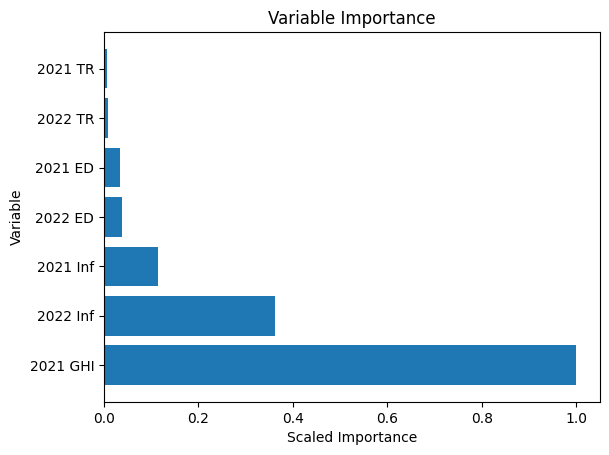

In [13]:
import matplotlib.pyplot as plt
feat_imp = best_model.varimp(use_pandas=True)
plt.barh(feat_imp['variable'], feat_imp['scaled_importance'])
plt.title('Variable Importance')
plt.xlabel('Scaled Importance')
plt.ylabel('Variable')
plt.savefig('/home/graham/Documents/Ironhack/Final-Project/images/feature2.png', bbox_inches='tight')

In [14]:
# actuals = valid[target_col].as_data_frame().values.flatten()
# predicted = predictions['predict'].as_data_frame().values.flatten()

# residuals = actuals - predicted
# abs_residuals = np.abs(residuals)

# # Define the colors for the data points
# colors = np.where(residuals >= 0, 'b', 'r')  # blue for under-predictions, red for over-predictions
# colors = colors.flatten()
# # Plot the residuals against the actual values with colored data points
# plt.scatter(actuals, predicted, c=colors, alpha=0.5)
# plt.scatter(actuals, actuals, c='g', marker='.', alpha=0.5)
# plt.xlabel('Actuals')
# plt.ylabel('Predicted')
# plt.title('Actuals versus Predicted')
# plt.savefig('/home/graham/Documents/Ironhack/Final-Project/images/AvP2.png', bbox_inches='tight')
# plt.show()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


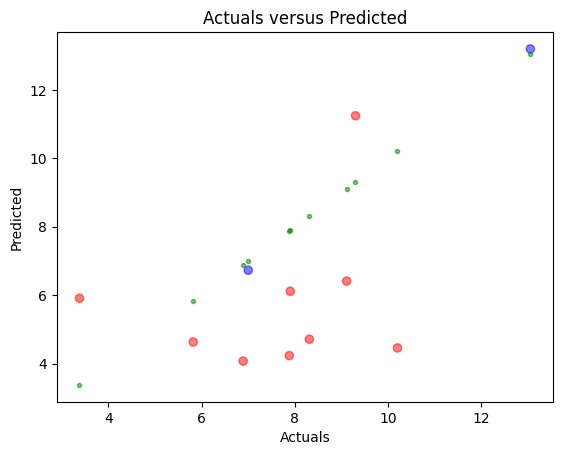

In [15]:
predictions = best_model.predict(valid)



# Extract the actual and predicted values
actuals = df[target_col].as_data_frame().dropna()[target_col].values.flatten()
predicted = predictions["predict"].as_data_frame().values.flatten()
valid_indices = valid.as_data_frame().index.values
actuals = actuals[valid_indices - 1]  # adjust indices to 0-based indexing
residuals = actuals - predicted
abs_residuals = np.abs(residuals)

# Define the colors for the data points
colors = ['blue' if r < 1 else 'red' for r in abs_residuals]
colors = np.array(colors).flatten()
# Plot the residuals against the actual values with colored data points
plt.scatter(actuals, predicted, c=colors, alpha=0.5)
plt.scatter(actuals, actuals, c='g', marker='.', alpha=0.5)
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.title('Actuals versus Predicted')
plt.savefig('/home/graham/Documents/Ironhack/Final-Project/images/AvP2.png', bbox_inches='tight')
plt.show()

In [22]:
# df = df.as_data_frame()


In [21]:
df.to_csv('/home/graham/Documents/Ironhack/Final-Project/data/predicted.csv')